In [1]:
## Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.0 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Anaconda\Lib\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "C:\Anaconda\Lib\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    app.start()
  File "C:\Anaconda\Lib\site-packages\ipykernel\kernelapp.py", line 701, in start
    self.io_loop.start()
  File "C:\Anaconda\Lib\site-packages\tornado\platform\asyncio.py", line 205, in star

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.0 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Anaconda\Lib\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "C:\Anaconda\Lib\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    app.start()
  File "C:\Anaconda\Lib\site-packages\ipykernel\kernelapp.py", line 701, in start
    self.io_loop.start()
  File "C:\Anaconda\Lib\site-packages\tornado\platform\asyncio.py", line 205, in star

ImportError: 
A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.0 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.



In [3]:
# load the train and test dataset
train = pd.read_csv("loan_train_data.csv")
test = pd.read_csv("loan_test_data.csv")

In [4]:
# make a copy of original data
train_original = train.copy()
test_original = test.copy()

In [5]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
#show the shape of the dataset i.e. no of rows, no of columns
train.shape, test.shape

((614, 13), (367, 12))

We will convert the "3+" category in the dependents variable to 3, making it numerical. Additionally, we will transform the target variable’s categories into 0 and 1, as some models, like logistic regression, require numeric input. We will replace "N" with 0 and "Y" with 1.

In [8]:
# replacing 3+ in Dependents variable with 3 for both train and test set
train['Dependents'].replace('3+', 3, inplace=True)
test['Dependents'].replace('3+', 3, inplace=True)

In [9]:
# replacing Y and N in Loan_Status variable with 1 and 0 respectively
train['Loan_Status'].replace('N', 0, inplace=True)
train['Loan_Status'].replace('Y', 1, inplace=True)

In [10]:
# check the dataset
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


***
# <a name="pre">Data Pre-processing</a>

Data pre-processing is a technique in data mining that focuses on converting raw data into a usable format. Real-world data is often incomplete, inconsistent, or missing certain patterns or trends, and can contain various errors. Data pre-processing helps address and resolve these issues.

## Handling Missing Values and Outliers  
After analyzing all the variables in our dataset, we can now address the missing values and outliers, as they can negatively impact model performance.

### Imputing Missing Values

Let’s start by listing the count of missing values for each feature.

In [13]:
# check for missing values
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

There are missing values in the Gender, Married, Dependents, Self_Employed, LoanAmount, Loan_Amount_Term, and Credit_History features. We will address the missing values in each feature individually.

To handle the missing values, we can use the following methods:

- For numerical variables: impute using the mean or median
- For categorical variables: impute using the mode

Since the missing values in Gender, Married, Dependents, Credit_History, and Self_Employed are minimal, we can fill them with the mode of each feature. However, if an independent variable has a large proportion of missing data (e.g., 80%), we would drop that variable from the dataset.

In [15]:
# replace missing values with the mode
train['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
train['Married'].fillna(train['Married'].mode()[0], inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)

Now, let’s explore how to fill the missing values in the Loan_Amount_Term. We will start by checking the value counts of the Loan_Amount_Term variable.

In [17]:
train['Loan_Amount_Term'].value_counts()

Loan_Amount_Term
360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64

It can be observed that the value 360 is the most frequent in the Loan_Amount_Term variable. Therefore, we will replace the missing values in this variable with its mode.

In [19]:
# replace missing value with the mode
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)

Next, let's look at the LoanAmount variable. Since it is numerical, we can use the mean or median to impute the missing values. We will use the median to fill the null values, as we observed earlier that the loan amount contains outliers, and the mean would be heavily influenced by them.

In [21]:
# replace missing values with the median value due to outliers
train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

In [22]:
# check whether all the missing values are filled in the Train dataset
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

As we can see, all the missing values in the train dataset have been filled. Now, let's apply the same approach to fill the missing values in the test dataset.

It’s important to replace the missing values in the test set using the mode, median, or mean from the training set, not from the test set. Similarly, if we remove values above a certain threshold in the test set, ensure that the threshold is derived from the training set, not the test set. Always calculate the mean (or any other metrics) based on the train data to avoid data leakage into the test set.

In [24]:
# replace missing values in Test set with mode/median from Training set
test['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
test['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
test['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
test['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)
test['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)
test['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

In [25]:
# check whether all the missing values are filled in the Test dataset
test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

As we can see that all the missing values have been filled in the Test dataset.


### Outlier Treatment

As observed earlier in the univariate analysis, the LoanAmount variable contains outliers, which need to be addressed because outliers can distort the data distribution. They can significantly impact the mean and standard deviation, thus affecting the overall distribution. It’s essential to take steps to handle outliers in the dataset.

The presence of outliers results in a left-skewed distribution with a long right tail, also known as right skewness (or positive skewness). One way to mitigate this skewness is by applying a log transformation. This transformation has minimal impact on smaller values but reduces the influence of larger values, bringing the distribution closer to a normal distribution.

Let’s visualize the effect of the log transformation, and we will apply the same changes to the test dataset simultaneously.

Text(0.5, 1.0, 'Test')

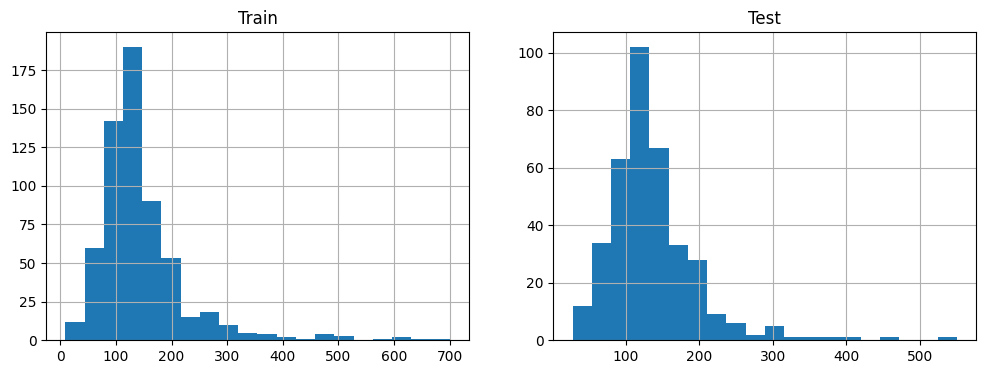

In [28]:
# before log transformation

ax1 = plt.subplot(121)
train['LoanAmount'].hist(bins=20, figsize=(12,4))
ax1.set_title("Train")

ax2 = plt.subplot(122)
test['LoanAmount'].hist(bins=20)
ax2.set_title("Test")

In [29]:
# Removing skewness in LoanAmount variable by log transformation
train['LoanAmount_log'] = np.log(train['LoanAmount'])
test['LoanAmount_log'] = np.log(test['LoanAmount'])

Text(0.5, 1.0, 'Test')

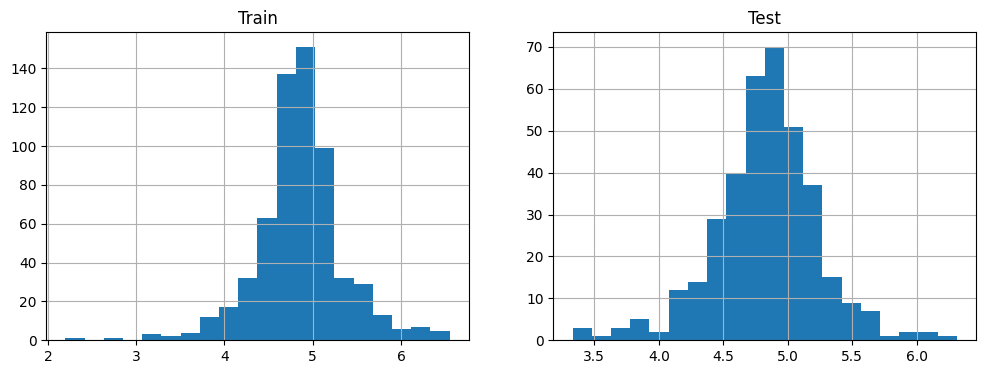

In [30]:
# after log transformation

ax1 = plt.subplot(121)
train['LoanAmount_log'].hist(bins=20, figsize=(12,4))
ax1.set_title("Train")

ax2 = plt.subplot(122)
test['LoanAmount_log'].hist(bins=20)
ax2.set_title("Test")

The distribution now appears much closer to normal, and the influence of extreme values has been significantly reduced. With the data pre-processed, we can proceed to build a logistic regression model and make predictions for the test dataset.

***
# <a name="model">Model Development and Evaluation</a>

There are two sub-sections in this stage:
- [Feature Engineering](#feature)
- [Model Building](#model)

## **Feature Engineering**  

Using domain knowledge, we can derive new features that may influence the target variable. Here, we will create three additional features:  

- **Total Income** – By combining Applicant Income and Coapplicant Income, we get the total household income. A higher total income could increase the likelihood of loan approval.  
- **Equated Monthly Installment (EMI)** – EMI represents the fixed monthly payment an applicant must make to repay the loan. Higher EMI amounts may indicate financial strain, potentially affecting the applicant’s ability to repay the loan. EMI is calculated as the ratio of the loan amount to the loan tenure.  
- **Balance Income** – This refers to the remaining income after deducting EMI payments. A higher balance income suggests better financial stability, increasing the chances of loan approval.

In [34]:
# combine Applicant Income and Coapplicant Income into a new variable
train['Total_Income'] = train['ApplicantIncome'] + train['CoapplicantIncome']
test['Total_Income'] = test['ApplicantIncome'] + test['CoapplicantIncome']

Text(0.5, 1.0, 'Test')

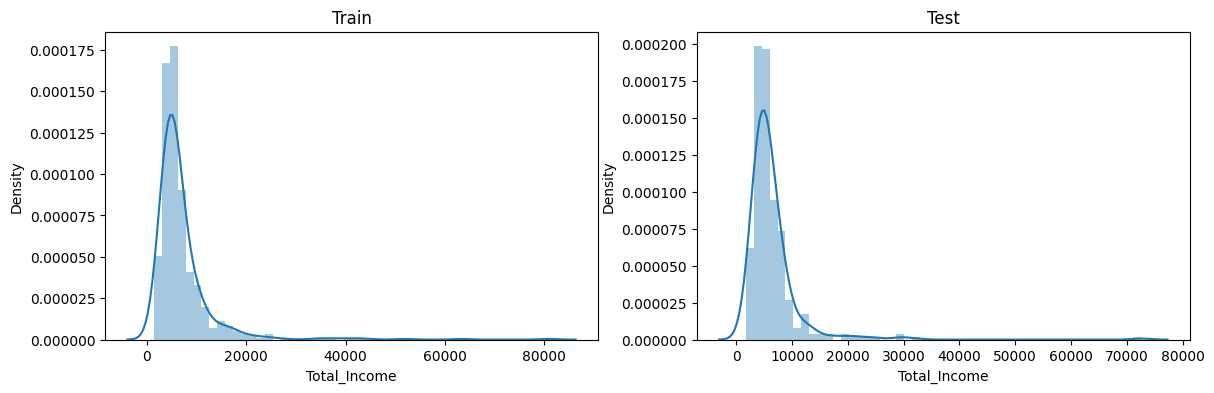

In [35]:
# Examine the distribution of Total Income before applying log transformation
fig = plt.figure(figsize = (14,4))
ax1 = plt.subplot(121)
sns.distplot(train["Total_Income"])
ax1.set_title("Train")

ax1 = plt.subplot(122)
sns.distplot(test["Total_Income"])
ax1.set_title("Test")



The distribution is skewed to the right, meaning it is shifted towards the left. To normalize it, we will apply a log transformation.

In [37]:
#log transformation
train['Total_Income_log'] = np.log(train['Total_Income'])
test['Total_Income_log'] = np.log(test['Total_Income'])

Text(0.5, 1.0, 'Test')

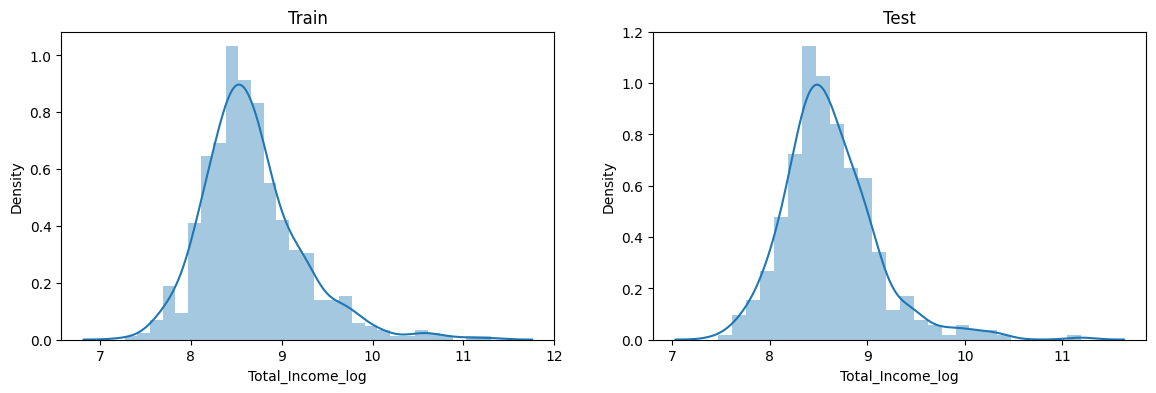

In [38]:
# after log transformation
fig = plt.figure(figsize=(14, 4))
ax1 = plt.subplot(121)
sns.distplot(train['Total_Income_log'])
ax1.set_title("Train")

ax1 = plt.subplot(122)
sns.distplot(test['Total_Income_log'])
ax1.set_title("Test")

After applying the log transformation, the distribution appears much closer to normal, and the impact of extreme values has been significantly reduced. Now, let's create the EMI feature by calculating the ratio of the loan amount to the loan term. This will serve as an approximation of the actual EMI.

In [40]:
#create EMI feature
train["EMI"] = train['LoanAmount'] / train['Loan_Amount_Term']
test["EMI"] = test['LoanAmount'] / test['Loan_Amount_Term']

Let's examine the distribution of the EMI variable, which is a continuous numerical feature.

Text(0.5, 1.0, 'Test')

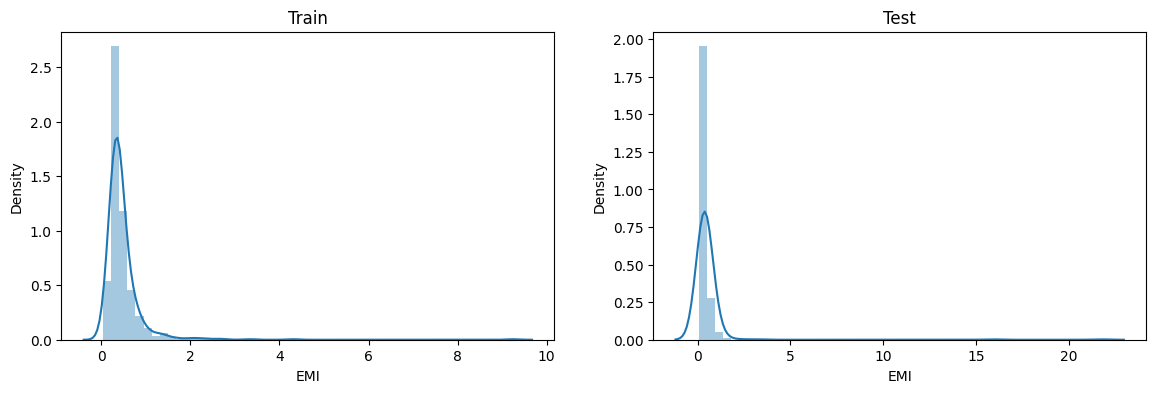

In [42]:
# check the distribution of EMI

fig = plt.figure(figsize = (14,4))
ax1 = plt.subplot(121)
sns.distplot(train["EMI"])
ax1.set_title("Train")

ax1 = plt.subplot(122)
sns.distplot(test["EMI"])
ax1.set_title("Test")

Let us create Balance Income feature now and check its distribution. This is the income left after the EMI has been paid.

In [44]:
# create new "Balance Income" variable
train['Balance Income'] = train['Total_Income'] - (train['EMI']*1000) # Multiply with 1000 to make the units equal 
test['Balance Income'] = test['Total_Income'] - (test['EMI']*1000)

Text(0.5, 1.0, 'Test')

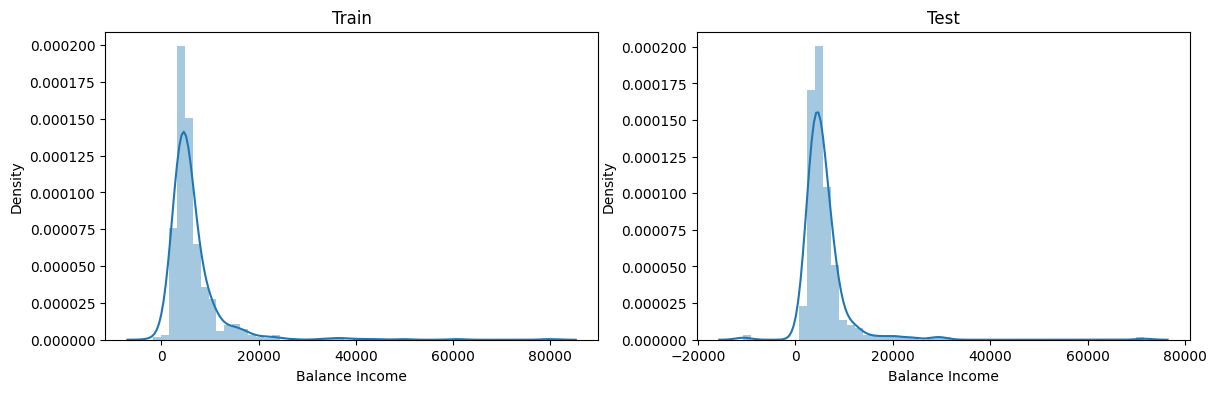

In [45]:
# check the distribution of EMI
# before log transformation

fig = plt.figure(figsize=(14, 4))
ax1 = plt.subplot(121)
sns.distplot(train['Balance Income'])
ax1.set_title("Train")

ax1 = plt.subplot(122)
sns.distplot(test['Balance Income'])
ax1.set_title("Test")

----

## **Model Building**

Once the new features are created, we can proceed with the model-building process. We will begin with a Logistic Regression model and then advance to more complex models like Random Forest and XGBoost.

The following models will be built in this section:

- Logistic Regression
- Decision Tree
- Random Forest
- XGBoost

Let's now prepare the data to feed into these models.

Now, let's drop the variables used to create the new features. The reason for this is that the correlation between the original features and the new ones will be high, and logistic regression assumes that the variables are not highly correlated. Additionally, removing these correlated features will help reduce noise in the dataset. Therefore, we will drop 'Loan_ID', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', and 'Loan_Amount_Term' as their information is already represented by 'Total Income', 'EMI', and 'Balance Income'.

In [49]:
# before dropping variables
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,Total_Income,Total_Income_log,EMI,Balance Income
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,1,4.852030,5849.0,8.674026,0.355556,5493.444444
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0,4.852030,6091.0,8.714568,0.355556,5735.444444
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1,4.189655,3000.0,8.006368,0.183333,2816.666667
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1,4.787492,4941.0,8.505323,0.333333,4607.666667
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1,4.948760,6000.0,8.699515,0.391667,5608.333333


In [50]:
# drop the variables
train = train.drop(['Loan_ID','ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], axis=1)
test = test.drop(['Loan_ID','ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], axis=1)

We will use **scikit-learn (sklearn)** for building different models. Scikit-learn is an open-source library for Python and is one of the most efficient tools available. It contains many built-in functions that are commonly used for modeling tasks in Python.

To learn more about scikit-learn, you can refer to the official tutorial here: [scikit-learn Tutorial](http://scikit-learn.org/stable/tutorial/index.html)

Since scikit-learn requires the target variable to be in a separate dataset, we will drop the target variable from the training dataset and store it in another variable.

In [52]:
# drop "Loan_Status" and assign it to target variable
X = train.drop('Loan_Status', axis= 1)
y = train.Loan_Status

Now, we will create **dummy variables** for the categorical variables. A dummy variable transforms categorical variables into a series of 0s and 1s, making it easier to quantify and compare them. Here's how this process works:

- Consider the "Gender" variable, which has two classes: Male and Female.
- Since logistic regression requires numerical values as input, we need to convert "Male" and "Female" into numerical values.
- After applying dummy variables to the "Gender" variable, it will be transformed into two new variables: **Gender_Male** and **Gender_Female**, each representing one class (Male and Female).
- **Gender_Male** will have a value of 0 if the gender is Female and a value of 1 if the gender is Male.

We can use **pandas `get_dummies`** function to convert categorical variables into dummy/indicator variables. This function will only affect the "object" (categorical) type variables and will leave the numerical variables unaffected.

In [54]:
# adding dummies to the dataset
X = pd.get_dummies(X)
train = pd.get_dummies(train)
test = pd.get_dummies(test)

In [55]:
X.shape, train.shape, test.shape

((614, 21), (614, 22), (367, 21))

In [56]:
X.head()

,Credit_History,LoanAmount_log,Total_Income,Total_Income_log,EMI,Balance Income,Gender_Female,Gender_Male,Married_No,Married_Yes,...,Dependents_0,Dependents_1,Dependents_2,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,1.0,4.852030,5849.0,8.674026,0.355556,5493.444444,False,True,True,False,...,True,False,False,True,False,True,False,False,False,True
1,1.0,4.852030,6091.0,8.714568,0.355556,5735.444444,False,True,False,True,...,False,True,False,True,False,True,False,True,False,False
2,1.0,4.189655,3000.0,8.006368,0.183333,2816.666667,False,True,False,True,...,True,False,False,True,False,False,True,False,False,True
3,1.0,4.787492,4941.0,8.505323,0.333333,4607.666667,False,True,False,True,...,True,False,False,False,True,True,False,False,False,True
4,1.0,4.948760,6000.0,8.699515,0.391667,5608.333333,False,True,True,False,...,True,False,False,True,False,True,False,False,False,True


Now, we will train the model on the training dataset and make predictions for the test dataset. But how can we validate these predictions? One way to do this is by dividing the training dataset into two parts: **train** and **validation**. We can train the model on the training portion and then use it to make predictions on the validation portion. Since we have the true labels for the validation part, we can compare the predicted values with the actual ones to validate the model's performance. Unfortunately, for the test dataset, we don't have the true labels to validate directly.

To split the dataset into **train** and **validation** sets, we will use the `train_test_split` function from **sklearn**. First, let's import the `train_test_split` function.

In [58]:
# import library
from sklearn.model_selection import train_test_split

In [59]:
# split the data into train and cross validation set
x_train, x_cv, y_train, y_cv = train_test_split(X, y, test_size=0.3, random_state=0)

In [60]:
# take a look at the dimension of the data
x_train.shape, x_cv.shape, y_train.shape, y_cv.shape

((429, 21), (185, 21), (429,), (185,))

The dataset has been successfully divided into training and validation parts. Now, let's proceed by importing **LogisticRegression** and **accuracy_score** from **sklearn**. We will then fit the logistic regression model to the training data and evaluate its performance on the validation set.

---

### **Logistic Regression**

In [64]:
# import libraries
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

In [65]:
# stratified 5 folds, shuffle each stratification of the data before splitting into batches

mean_accuracy = []
i = 1
kf = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)

for train_index, test_index in kf.split(X, y):
    print('\n{} of kfold {}'.format(i, kf.n_splits))
    xtr, xvl = X.loc[train_index], X.loc[test_index]
    ytr, yvl = y[train_index], y[test_index]
    
    model = LogisticRegression(random_state=1)
    model.fit(xtr, ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl, pred_test)
    mean_accuracy.append(score)
    print('accuracy_score', score)
    i+=1
    
print("\nMean validation accuracy: ", sum(mean_accuracy)/len(mean_accuracy))


# make prediction on test set
pred_test = model.predict(test)


1 of kfold 5
accuracy_score 0.7886178861788617

2 of kfold 5
accuracy_score 0.8373983739837398

3 of kfold 5
accuracy_score 0.7967479674796748

4 of kfold 5
accuracy_score 0.7967479674796748

5 of kfold 5
accuracy_score 0.7950819672131147

Mean validation accuracy:  0.8029188324670132


We got an accuracy of 0.8029 on the leaderboard. Let us look at some other algorithms.

---

### **Decision Tree**

A **Decision Tree** is a supervised learning algorithm (where the target variable is predefined) that is primarily used for classification problems. This technique involves splitting the dataset into two or more homogeneous subsets (or sub-populations) based on the most significant differentiator among the input variables.

### How Decision Trees Work:
- Decision trees use various algorithms to determine the best way to split a node into two or more sub-nodes.
- The goal is to increase the homogeneity of the resulting sub-nodes, meaning that the data within each node becomes more similar concerning the target variable.
- As the tree grows, the **purity** of the nodes improves, making it easier to classify new data.

For a more detailed explanation, refer to this guide:  
[Complete Tutorial on Tree-Based Modeling](https://www.analyticsvidhya.com/blog/2016/04/complete-tutorial-tree-based-modeling-scratch-in-python/#six).

In [70]:
# import library 
from sklearn import tree

In [71]:
mean_accuray = []
i=1
kf = StratifiedKFold(n_splits = 5, random_state=1, shuffle= True)
for train_index, test_index in kf.split(X,y):
    print('\n{} of kfold {}'.format(i, kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y[train_index], y[test_index]

    model = tree.DecisionTreeClassifier(random_state=1)
    model.fit(xtr,ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl,pred_test)
    mean_accuracy.append(score)
    print('accuracy_score',score)
    i+=1

print('\nMean Validation Accuracy: ',sum(mean_accuracy)/len(mean_accuracy))

# make prediction on test set
pred_test = model.predict(test)


1 of kfold 5
accuracy_score 0.7398373983739838

2 of kfold 5
accuracy_score 0.6747967479674797

3 of kfold 5
accuracy_score 0.7235772357723578

4 of kfold 5
accuracy_score 0.7479674796747967

5 of kfold 5
accuracy_score 0.6475409836065574

Mean Validation Accuracy:  0.7548314007730241


The mean validation accuracy for this model is 0.754, which is lower than Logistic Regression.So let’s build another model, i.e. Random Forest, a tree based ensemble algorithm and try to improve our model by improving the accuracy.

---

### **Random Forest**

- **Random Forest** is a tree-based bootstrapping algorithm where multiple weak learners (**decision trees**) are combined to create a powerful prediction model.  
- For each individual decision tree, a **random subset** of rows and a **random selection** of features are used to build the model.  
- The **final prediction** is determined by aggregating predictions from all individual trees:  
  - In **classification problems**, the final prediction is based on majority voting.  
  - In **regression problems**, the final prediction is the average of all predictions.  

### Key Hyperparameters in RandomForestClassifier (sklearn)  

- **`n_estimators`**: Represents the number of trees in the forest. Generally, a higher number leads to better performance, with a low risk of overfitting. We'll use the default value of **10**.  
- **`max_depth`**: Defines the maximum depth of each tree. By default, it's **None** (allowing trees to grow fully). Reducing it can help prevent overfitting. We'll limit it to **10** for better generalization.  

For a more detailed explanation, refer to this article:  
[Complete Tutorial on Tree-Based Modeling](https://www.analyticsvidhya.com/blog/2016/04/complete-tutorial-tree-based-modeling-scratch-in-python/).

In [76]:
# import library
from sklearn.ensemble import RandomForestClassifier

In [77]:
mean_accuracy = []
i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X, y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y[train_index],y[test_index]

    model = RandomForestClassifier(random_state=1, max_depth= 10, n_estimators=10)
    model.fit(xtr, ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl, pred_test)
    mean_accuracy.append(score)
    print('accuracy_score', score)
    i+=1

print('\nMean Validation Accuracy: ', sum(mean_accuracy)/len(mean_accuracy))
pred_test=model.predict(test)


1 of kfold 5
accuracy_score 0.8048780487804879

2 of kfold 5
accuracy_score 0.8130081300813008

3 of kfold 5
accuracy_score 0.7804878048780488

4 of kfold 5
accuracy_score 0.8048780487804879

5 of kfold 5
accuracy_score 0.7377049180327869

Mean Validation Accuracy:  0.7881913901106224


### Feature Importance 

Now, let's identify the most significant features for this problem. We will use the **`feature_importances_`** attribute from **scikit-learn**, which helps determine the importance of each feature in making predictions.  

- **Feature importance** indicates how much a feature contributes to the model’s decision-making.  
- A **higher value** means the feature is more influential in predicting the target variable.  

This will help us understand which features play a crucial role in our model's performance.

<Axes: >

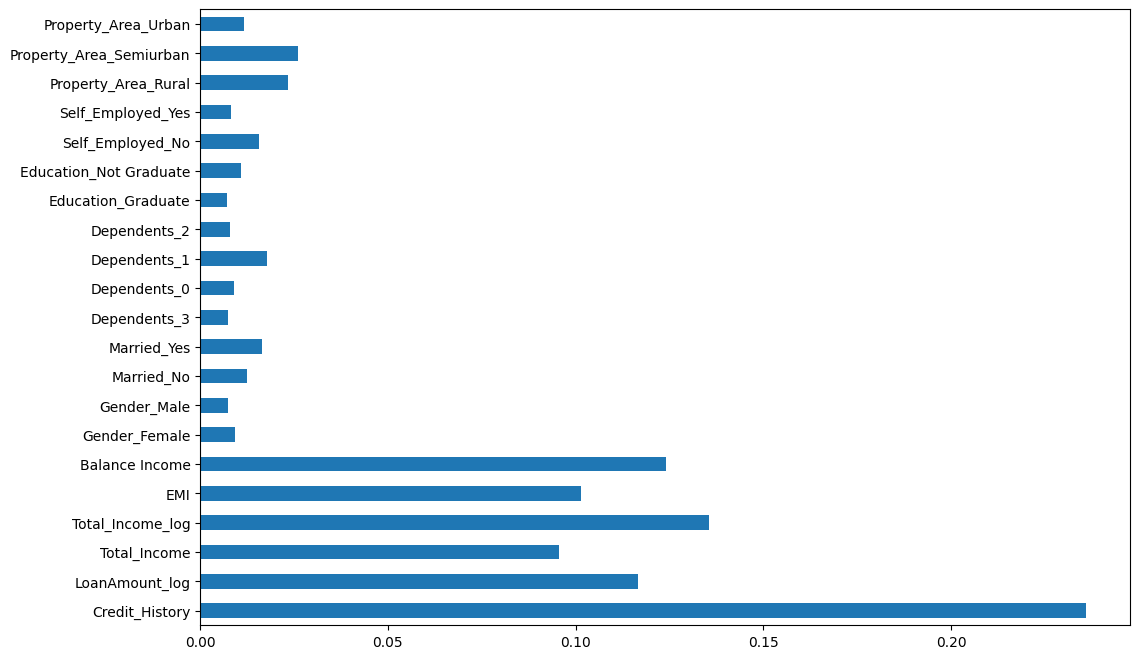

In [79]:
# extract feature importances, convert into a Series
importances = pd.Series(model.feature_importances_, index=X.columns)

# plot the horizontal bar chart
importances.plot(kind='barh', figsize=(12,8))

We can see that Credit_History is the most important feature followed by Balance Income, Total Income Log, Total Income, LoanAmount_log , EMI. So, feature engineering helped us in predicting our target variable.

---

### **XGBoost**

XGBoost is a highly efficient and fast algorithm, widely used in data science competitions. It is a **boosting algorithm**, which enhances model performance by combining multiple weak learners into a strong one. You can learn more about boosting from this article: [Boosting Algorithms in Machine Learning](https://www.analyticsvidhya.com/blog/2015/11/quick-introduction-boosting-algorithms-machine-learning/).  

Since XGBoost only works with numerical variables, and we have already converted categorical variables into numerical ones, we can proceed with the model.  

#### Key Parameters in XGBoost Model  
- **`n_estimators`**: Defines the number of trees in the model.  
- **`max_depth`**: Determines the maximum depth of each tree.  

These parameters help in optimizing model performance and preventing overfitting.

In [84]:
# import library
from xgboost import XGBClassifier

In [85]:
mean_accuracy = []
i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y[train_index],y[test_index]
    
    model = XGBClassifier(random_state=1, n_estimators=50, max_depth=4)
    model.fit(xtr, ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl,pred_test)
    mean_accuracy.append(score)
    print('accuracy_score',score)
    i+=1
    
print("\nMean validation accuracy: ", sum(mean_accuracy)/len(mean_accuracy))
pred_test = model.predict(test)


1 of kfold 5
accuracy_score 0.7642276422764228

2 of kfold 5
accuracy_score 0.7886178861788617

3 of kfold 5
accuracy_score 0.7723577235772358

4 of kfold 5
accuracy_score 0.7723577235772358

5 of kfold 5
accuracy_score 0.7704918032786885

Mean validation accuracy:  0.7736105557776889


The mean validation accuracy for this model is 0.773

---

### **Conclusion**  

After experimenting with four different algorithms, **Logistic Regression** achieved the highest accuracy on the public leaderboard with **0.802**. The accuracy for other models was as follows:  
- **Decision Tree**: 0.754  
- **Random Forest**: 0.788  
- **XGBoost**: 0.773  

Although **feature engineering** helped in improving predictions, it did not significantly boost the overall model accuracy. In this case, **Logistic Regression** outperformed more complex models like **Random Forest** and **XGBoost**. Its **simplicity, efficiency, and ease of implementation** make it a strong baseline model for comparison in machine learning projects.  

Overall, this project provided valuable insights into the process of participating in a **machine learning competition**, from **data preprocessing** to **model selection and evaluation**, helping to develop a structured approach to building robust predictive models.